In [335]:
avg_work = 0 #6000 * 12
conversion_rate = 1.2
seed = 10 #5_5000

# 0. viral coefficient
# history_new_customers = [0]
# new_customers = 0
# for year in range(1,10):
#     nexrt_new_customers = new_customers * avg_referrals * conversion_rate + avg_work
#     history_new_customers.append(nexrt_new_customers)
#     history_user_base.append(history_user_base[-1] + nexrt_new_customers)

#     new_customers = nexrt_new_customers

# 1. repeat new friend
# history_seed = []
# history_k = []
# history_total = []
# for year in range(1, 10):
#     k  = seed * conversion_rate
#     total = seed + k
#     history_seed.append(seed)
#     history_k.append(k)
#     history_total.append(total)

#     seed = total + avg_work

# history_user_base = history_total

history_seed = []
history_k = []
history_total = []
for year in range(1, 10):
    k  = seed * conversion_rate
    history_seed.append(seed)
    history_k.append(k)
    if year == 1:
        history_total.append(seed + k)
    
    seed = k + avg_work
    if year > 1:
        history_total.append(seed + history_total[-1])

history_user_base = history_total

0     22.000000
1     36.400000
2     53.680000
3     74.416000
4     99.299200
5    129.159040
6    164.990848
7    207.989018
8    259.586821
dtype: float64

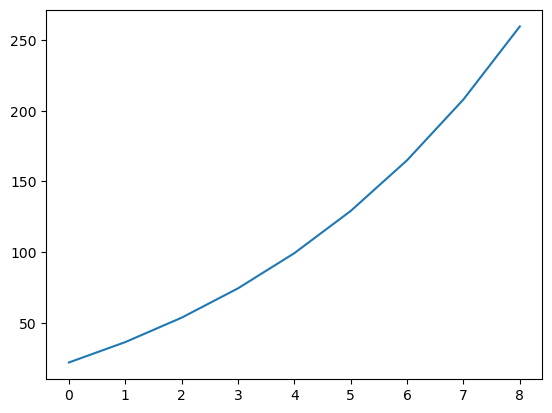

In [336]:
import pandas as pd

history_user_base =  pd.Series(history_user_base)
history_user_base.plot()
pd.DataFrame(history_user_base / 10_000).T.to_csv('history_user_base.csv')
history_user_base

In [337]:
game_2_invest_conversion_rate = 0.03
invest_user_base = history_user_base * game_2_invest_conversion_rate
pd.DataFrame(invest_user_base / 10_000).T.to_csv('invest_user_base.csv')

0     6600.000000
1    10920.000000
2    16104.000000
3    22324.800000
4    29789.760000
5    38747.712000
6    49497.254400
7    62396.705280
8    77876.046336
dtype: float64

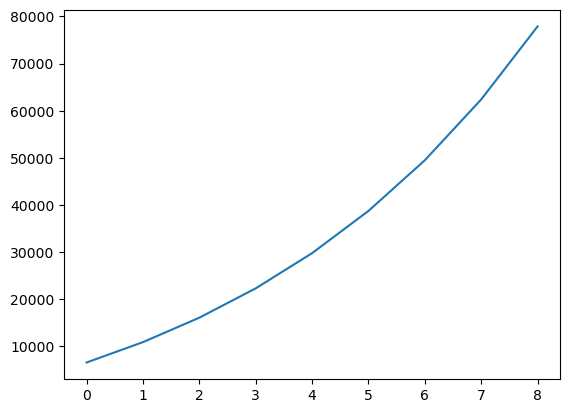

In [338]:
normal_capital = 10_000
annual_return = 0.05

capital_base = invest_user_base * normal_capital
capital_base.plot()
pd.DataFrame(capital_base / 100_000_000).T.to_csv('capital_base.csv')
capital_base

0     6600.000000
1    10920.000000
2    16104.000000
3    22324.800000
4    29789.760000
5    38747.712000
6    49497.254400
7    62396.705280
8    77876.046336
dtype: float64

,capital_growth
0,NaN
1,4320.000000
2,5184.000000
3,6220.800000
4,7464.960000
5,8957.952000
6,10749.542400
7,12899.450880
8,15479.341056


,capital_growth,0,1,2,3,4,5,6,7,8
0,6600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4320.000000,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5184.000000,1.05,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6220.800000,1.05,1.05,1.05,NaN,NaN,NaN,NaN,NaN,NaN
4,7464.960000,1.05,1.05,1.05,1.05,NaN,NaN,NaN,NaN,NaN
5,8957.952000,1.05,1.05,1.05,1.05,1.05,NaN,NaN,NaN,NaN
6,10749.542400,1.05,1.05,1.05,1.05,1.05,1.05,NaN,NaN,NaN
7,12899.450880,1.05,1.05,1.05,1.05,1.05,1.05,1.05,NaN,NaN
8,15479.341056,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,NaN


,capital_growth,0,1,2,3,4,5,6,7,8
0,6600.000000,6600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4320.000000,6930.000000,4320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5184.000000,7276.500000,4536.000000,5184.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,6220.800000,7640.325000,4762.800000,5443.200000,6220.800000,NaN,NaN,NaN,NaN,NaN
4,7464.960000,8022.341250,5000.940000,5715.360000,6531.840000,7464.960000,NaN,NaN,NaN,NaN
5,8957.952000,8423.458313,5250.987000,6001.128000,6858.432000,7838.208000,8957.952000,NaN,NaN,NaN
6,10749.542400,8844.631228,5513.536350,6301.184400,7201.353600,8230.118400,9405.849600,10749.542400,NaN,NaN
7,12899.450880,9286.862790,5789.213168,6616.243620,7561.421280,8641.624320,9876.142080,11287.019520,12899.450880,NaN
8,15479.341056,9751.205929,6078.673826,6947.055801,7939.492344,9073.705536,10369.949184,11851.370496,13544.423424,15479.341056


0     6600.000000
1    11250.000000
2    16996.500000
3    24067.125000
4    32735.441250
5    43330.165312
6    56246.215978
7    71957.977657
8    91035.217596
dtype: float64

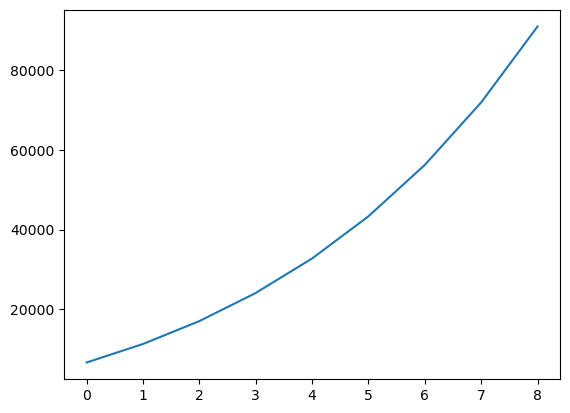

In [339]:
import numpy as np

capital_growth = pd.DataFrame(capital_base.diff().rename('capital_growth'))
display(capital_base)
exp_growth = capital_growth.copy()
exp_growth.loc[0] = capital_base.loc[0]
display(capital_growth)
for i in exp_growth.index:
    exp_growth.loc[:, i] =pd.Series([np.nan] * (1 + i) + [1 + annual_return] * (len(exp_growth) - i))
display(exp_growth)
for i in exp_growth.index:
    se = exp_growth.loc[:, i]
    se[i] = exp_growth['capital_growth'].loc[i]
    exp_growth.loc[:, i] = se.cumprod()
display(exp_growth)
exp_growth = exp_growth.iloc[:, 1:].sum(axis=1)
display(exp_growth)
exp_growth.plot()
pd.DataFrame(exp_growth / 100_000_000).T.to_csv('exp_growth.csv')

In [340]:
yeardict = {
    1:'一',
    2:'二',
    3:'三',
    4:'四',
    5:'五',
    6:'六',
    7:'七',
    8:'八',
    9:'九'
}
df = pd.DataFrame(
    [
pd.Series(history_seed).rename('种子用户数W') / 10_000,
pd.Series(history_k).rename('裂变用户数W（{}%）'.format(conversion_rate * 100)) / 10_000,
pd.Series(history_total).rename('总数客户数W') / 10_000,
pd.Series(invest_user_base).rename('{}%客户数转普通客户'.format(game_2_invest_conversion_rate*100)) / 10_000,
pd.Series(capital_base).rename('普通客户人均{}W份额（亿）'.format(normal_capital / 10_000)) / 1_0000_0000,
pd.Series(exp_growth).rename('年化5%规模（亿）') / 1_0000_0000
])
df.columns = [f'第{yeardict[i]}年' for i in range(1, 10)]
df.to_csv('{}.csv'.format(normal_capital))